In [1]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:44, 4521.21it/s]



Посмотрим на пример отзыва:

In [4]:
responses[100]

{'city': 'г. Кострома',
 'rating_not_checked': False,
 'title': 'Как быстро данные о погашении кредита передаются в БКИ?',
 'num_comments': 4,
 'bank_license': 'лицензия № 3349',
 'author': 'Natlion',
 'bank_name': 'Россельхозбанк',
 'datetime': '2015-06-03 21:29:27',
 'text': 'Здравствуйте, Уважаемые сотрудники банка! В декабре 2014 года я взяла потребительский кредит, 26.05.2015 года досрочно его погасила. На данный момент пытаюсь оформить ипотеку в другом банке, но данные о погашении кредита не дошли до БКИ, справки о закрытии кредита не помогут, в банке сказали - ждать обновления кредитной истории для подачи заявки. В связи с этим хотелось бы узнать - как часто данные из Вашего банка передаются в БКИ? Ни в местных отделениях банка, ни по телефону горячей линии не смогли дать однозначного ответа, одни говорят- неделя, другие-две, третьи- месяц. В результате этого возник вопрос, потому как на квартиру, которую хочу приобрести, оформлена бронь, которая через две недели закончится и в 

### Create dataframe

In [5]:
data = pd.DataFrame(responses)
data.head(3)

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Москва,False,Жалоба,0,лицензия № 2562,uhnov1,Бинбанк,2015-06-08 12:50:54,Добрый день! Я не являюсь клиентом банка и пор...,NaN
1,г. Новосибирск,False,Не могу пользоваться услугой Сбербанк он-лайн,0,лицензия № 1481,Foryou,Сбербанк России,2015-06-08 11:09:57,Доброго дня! Являюсь держателем зарплатной кар...,NaN
2,г. Москва,False,Двойное списание за один товар.,1,лицензия № 2562,Vladimir84,Бинбанк,2015-06-05 20:14:28,Здравствуйте! Дублирую свое заявление от 03.0...,NaN


In [83]:
data['bank_name'].unique()

array(['Бинбанк', 'Сбербанк России', 'ОТП Банк', 'Гагаринский',
       'Тинькофф Банк', 'Восточный Экспресс Банк', 'ВТБ 24', 'Альфа-Банк',
       'БИНБАНК кредитные карты', 'МТС Банк', 'Совкомбанк',
       'Россельхозбанк', 'Московский Кредитный Банк', 'МДМ Банк',
       'Хоум Кредит Банк', 'Бенифит-Банк',
       'Уральский Банк Реконструкции и Развития', 'Русский Стандарт',
       'Лето Банк', 'Петрокоммерц', 'Русфинанс Банк', 'Киви Банк',
       'Ханты-Мансийский банк Открытие', 'Русславбанк', 'Татфондбанк',
       'МАСТ-Банк', 'Национальный Банк «Траст»',
       'Военно-Промышленный Банк', 'АктивКапитал Банк', 'Связной Банк',
       'Платежный Центр', 'Московский Индустриальный Банк',
       'Финансовый Стандарт', 'Ренессанс Кредит', 'Югра',
       'ЮниКредит Банк', 'Банкирский Дом', 'Кредит Европа Банк',
       'Тройка-Д Банк', 'ДельтаКредит', 'Сетелем Банк', 'РосинтерБанк',
       'ФК Открытие (бывш. НОМОС-Банк)', 'Банк Москвы', 'Росбанк',
       'Авангард', 'Внешпромбанк', 'Росэн

In [6]:
import re

In [7]:
#clean cities name
data['city_clean'] = data['city'].str.replace(r'^г. ', '')
data['city_clean'] = data['city_clean'].str.lower()

C:\Users\spass\AppData\Local\Temp/ipykernel_9184/1822973779.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['city_clean'] = data['city'].str.replace(r'^г. ', '')


In [8]:
#Count of responses by city
cities = data.groupby(['city_clean']).count()['text'].sort_values(ascending=False).head(10)
cities

city_clean
москва             56698
санкт-петербург    14644
новосибирск         2378
екатеринбург        2373
нижний новгород     2034
ростов-на-дону      1928
самара              1783
челябинск           1537
казань              1515
уфа                 1316
Name: text, dtype: int64

In [9]:
data['bank_clean'] = data['bank_name'].str.lower()

In [10]:
#Count of responses by bank
banks = data.groupby(['bank_clean']).count()['text'].sort_values(ascending=False).head(10)
banks

bank_clean
сбербанк россии              26327
альфа-банк                   10224
втб 24                        8185
русский стандарт              7943
хоум кредит банк              7549
тинькофф банк                 5387
национальный банк «траст»     4607
ренессанс кредит              3849
связной банк                  3775
отп банк                      3237
Name: text, dtype: int64

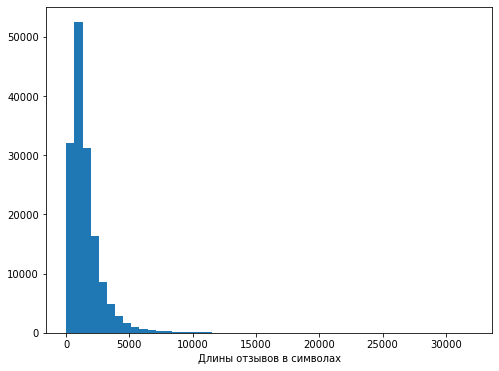

In [11]:
len_c = data.text.apply(len)
rcParams['figure.figsize'] = 8, 6
len_c.plot(kind='hist',bins=50)
plt.xlabel('Длины отзывов в символах')
plt.ylabel('')
plt.show()

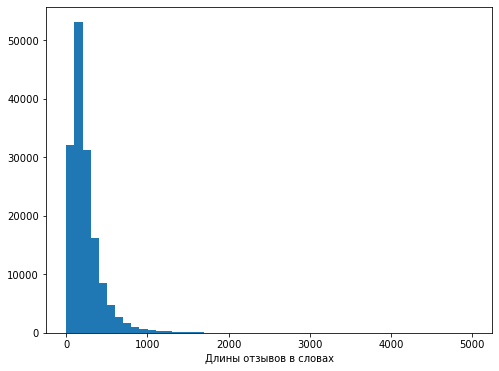

In [12]:
len_t = data.text.str.split().apply(len)
rcParams['figure.figsize'] = 8, 6
len_t.plot(kind='hist',bins=50)
plt.xlabel('Длины отзывов в словах')
plt.ylabel('')
plt.show()

### Preprocessing, calculation of top 10 words, words w/o stopwords, lemmas and noun

In [13]:
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
import string
from string import punctuation

In [14]:
data['word_tokenize'] = data['text'].apply(word_tokenize)

In [15]:
def remove_punctuation(words):
    # Define a set of punctuation marks to remove
    punct = set(string.punctuation + ':')
    
    # Iterate over each word in the list and remove any punctuation marks
    words_clean = []
    for word in words:
        if word not in punct:
            words_clean.append(word)
    
    # Return the cleaned list of words
    return words_clean
# Apply the remove_punctuation function to the "words" column using apply()
data['word_tokenize_no_punctuation'] = data['word_tokenize'].apply(remove_punctuation)


In [17]:
# Top 10 words
from collections import Counter
from tqdm import tqdm_notebook as tqdm
from collections import Counter   

cnt = Counter()
n_types = []
n_tokens = []
tokens = []

for index, row in tqdm(data.iterrows(), total = len(data)):
    tokens = row['word_tokenize_no_punctuation']
    cnt.update(tokens)
    n_types.append(len(cnt))
    n_tokens.append(sum(list(cnt.values())))

for i in cnt.most_common(10):
    print(i)

C:\Users\spass\AppData\Local\Temp/ipykernel_9184/3701011183.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index, row in tqdm(data.iterrows(), total = len(data)):


  0%|          | 0/153499 [00:00<?, ?it/s]

('в', 1169557)
('и', 980761)
('не', 816419)
('на', 638715)
('что', 603171)
('я', 443478)
('с', 428021)
('по', 338743)
('мне', 293980)
('банка', 235176)


In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [19]:
def tokenize_and_remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    filtered_tokens = []
    for token in tokens:
        if token not in stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также', 'т', 'д', 'г']:
            filtered_tokens.append(token)
    return filtered_tokens

# Apply the remove_stopwords function to the "words" column using apply()
data['words_clean'] = data.iloc[:10000]['text'].apply(tokenize_and_remove_stopwords)

In [21]:
# Top 10 words without stopwords

# Concatenate all the token lists into a single list
all_tokens_c = []
for token_list_ in data.iloc[:10000]['words_clean']:
    for token_ in token_list_:
        all_tokens_c.append(token_)

# Count the frequency of each token using collections.Counter
token_counts_ = Counter(all_tokens_c)

# Get the 10 most common tokens
top_tokens_ = token_counts_.most_common(10)

# Print the top tokens and their frequencies
for token_, count in top_tokens_:
    print(f"{token_}: {count}")

банка: 16676
банк: 12868
деньги: 6986
карты: 5964
карту: 5618
день: 4711
кредит: 4631
заявление: 3933
банке: 3776
года: 3694


In [22]:
from pymystem3 import Mystem

In [26]:
# Load Mystem
mystem = Mystem()

# Define a function to remove stopwords and create lemmas using Mystem
def preprocess(text):
    mystoplemmas = stopwords.words('russian') + ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'г']
    tokens = mystem.lemmatize(text.lower())
    lemmas = []
    for token in tokens:
        if token.isalpha() and token not in mystoplemmas:
            lemmas.append(token)
    return ' '.join(lemmas)
# Apply the preprocess function to a column in a dataframe
data['lemmas'] = data.iloc[:10000]['text'].apply(preprocess)

In [27]:
# Top 10 lemmas without stopwords

# создаем счетчик для подсчета слов
word_counter = Counter()

# итерируемся по всем строкам в колонке "lemmas" 
for row in data.iloc[:10000]['lemmas']:
    regex = re.compile(r'\b\w+\b')
    # используем регулярное выражение для распарсивания строки на слова
    words_ = regex.findall(row.lower())
    # обновляем счетчик слов
    word_counter.update(words_)

# выводим 10 наиболее часто встречающихся слов
for word, count in word_counter.most_common(10):
    print(word, count)

банк 38240
карта 18947
это 13155
день 10072
кредит 9775
деньги 9577
сотрудник 9375
клиент 7981
счет 7892
весь 7622


In [28]:
#nouns identification
mystem = Mystem()
def get_nouns(text):
    nouns = []
    for token in mystem.analyze(text):
        if token.get('analysis'):
            pos = token['analysis'][0]['gr'].split(',')[0]
            if pos == 'S':
                nouns.append(token['analysis'][0]['lex'])
    return ' '.join(nouns)


In [29]:
# Применение функции к столбцу DataFrame "lemmas
data['nouns'] = data.iloc[:10000]['lemmas'].apply(get_nouns)


In [30]:
# Top 10 nouns without stopwords

# создаем счетчик для подсчета слов
word_counter_1 = Counter()

# итерируемся по всем строкам в колонке "nouns" 
for row_1 in data.iloc[:10000]['nouns']:
    regex = re.compile(r'\b\w+\b')
    # используем регулярное выражение для распарсивания строки на слова
    words_1 = regex.findall(row_1.lower())
    # обновляем счетчик слов
    word_counter_1.update(words_1)

# выводим 10 наиболее часто встречающихся слов
for word_1, count in word_counter_1.most_common(10):
    print(word_1, count)

банк 40982
карта 18947
день 10072
кредит 9775
деньги 9577
сотрудник 9375
клиент 7981
счет 7892
сумма 6995
отделение 6909


### Hick's law and Zipf's law

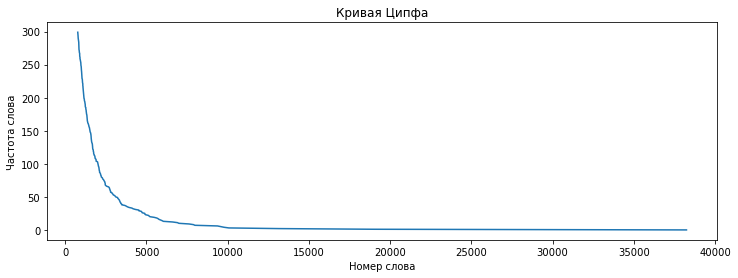

In [31]:
#Zipf's law
freqs = list(word_counter.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(freqs[:300], range(300))
plt.xlabel('Номер слова')
plt.ylabel('Частота слова')
plt.title('Кривая Ципфа')
plt.show()

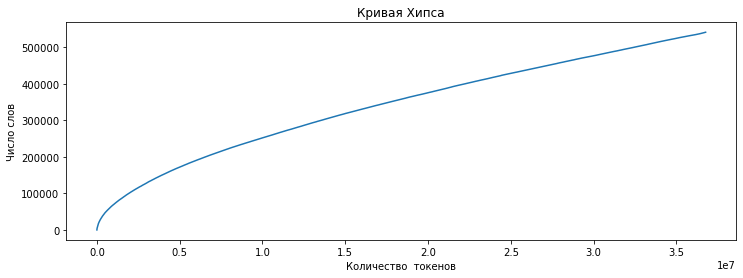

In [33]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(n_tokens,n_types)
plt.xlabel('Количество  токенов')
plt.ylabel('Число слов')
plt.title('Кривая Хипса')
plt.show()

### Frequency of words "сотрудник" или "клиент" and "мошенничество" и "доверие"

In [37]:
from nltk import FreqDist
Freq_Dist = FreqDist(all_tokens_c)

In [38]:
print('Слово "сотрудник" встречается -"',Freq_Dist['сотрудник'],'раз')
print('Слово "клиент" встречается -"',Freq_Dist['клиент'],'раз')

Слово "сотрудник" встречается -" 2229 раз
Слово "клиент" встречается -" 970 раз


In [39]:
print('Слово "мошенничество" встречается -"',Freq_Dist['мошенничество'],'раз')
print('Слово "доверие" встречается -"',Freq_Dist['доверие'],'раз')

Слово "мошенничество" встречается -" 84 раз
Слово "доверие" встречается -" 85 раз


### Key words and bi-gramms

In [40]:
data['rating_grade'].value_counts()

1.0    47387
5.0    14713
2.0    13509
3.0     9261
4.0     3788
Name: rating_grade, dtype: int64

In [41]:
num=10000

df_sample = data[(data.rating_grade==1)].sample(n=num).copy()
df_sample = df_sample.append(data[(data.rating_grade==5)].sample(n=num))

df_sample.rating_grade.value_counts()

1.0    10000
5.0    10000
Name: rating_grade, dtype: int64

In [42]:
tokens_by_topic = []

for rating in df_sample.rating_grade.unique():
    tokens_k=[]
    sample=df_sample[df_sample['rating_grade']==rating]
    
    for i in range(len(sample[sample.lemmas.notnull()])):
        tokens_k += sample[sample.lemmas.notnull()]['lemmas'].iloc[i].split()
        
    tokens_by_topic.append(tokens_k)

### Unigramms

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking_5 = []
tfidf_ranking_1 = []
dense = tfidf_matrix.todense()

text = dense[1].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_5.append(phrase)
    
text = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_1.append(phrase)

In [44]:
rank = pd.DataFrame({'tfidf_ranking_5': tfidf_ranking_5,'tfidf_ranking_1': tfidf_ranking_1})
rank.head(10)

,tfidf_ranking_5,tfidf_ranking_1
0,банк,банк
1,карта,карта
2,весь,это
3,это,сотрудник
4,сотрудник,деньги
5,клиент,день
6,очень,отделение
7,день,кредит
8,отделение,сказать
9,вклад,счет


In [45]:
#remove cross-words

rank['tfidf_ranking_5_without_1']=rank.tfidf_ranking_5[~rank.tfidf_ranking_5.isin(rank.tfidf_ranking_1)]
rank['tfidf_ranking_1_without_5']=rank.tfidf_ranking_1[~rank.tfidf_ranking_1.isin(rank.tfidf_ranking_5)]

In [46]:
rank.iloc[:,-2:].dropna()

,tfidf_ranking_5_without_1,tfidf_ranking_1_without_5
17,спасибо,ответ
29,минута,номер
36,открывать,звонить
38,быстро,сообщать
40,человек,звонок
48,решение,почему
51,процент,говорить
53,становиться,срок
56,условие,принимать
59,благодарность,должный


### Bi-gramms

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking_rank_is_5 = []
tfidf_ranking_rank_is_1 = []
dense = tfidf_matrix.todense()

text = dense[1].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_rank_is_5.append(phrase)
    
text = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_rank_is_1.append(phrase) 

In [48]:
rankings = pd.DataFrame({'tfidf_ranking_rank_is_5': tfidf_ranking_rank_is_5,'tfidf_ranking_rank_is_1': tfidf_ranking_rank_is_1})
rankings.head(10)

,tfidf_ranking_rank_is_5,tfidf_ranking_rank_is_1
0,кредитный карта,сотрудник банк
1,интернет банк,денежный средство
2,сотрудник банк,горячий линия
3,клиент банк,отделение банк
4,отделение банк,кредитный карта
5,выражать благодарность,написать заявление
6,открывать вклад,добрый день
7,дебетовый карта,колл центр
8,добрый день,приходить смс
9,хотеть выражать,рабочий день


In [49]:
rankings['tfidf_ranking_rank_is_5_without_1']=rankings.tfidf_ranking_rank_is_5[~rankings.tfidf_ranking_rank_is_5.isin(rankings.tfidf_ranking_rank_is_1)]
rankings['tfidf_ranking_rank_is_1_without_5']=rankings.tfidf_ranking_rank_is_1[~rankings.tfidf_ranking_rank_is_1.isin(rankings.tfidf_ranking_rank_is_5)]


In [50]:
rankings.iloc[:,-2:].dropna()

,tfidf_ranking_rank_is_5_without_1,tfidf_ranking_rank_is_1_without_5
11,весь вопрос,ваш банк
16,благодарность сотрудник,получать ответ
24,приятно удивлять,офис банк
25,огромный благодарность,деньги счет
26,очень быстро,номер телефон
28,кредитный лимит,приходить отделение
32,процентный ставка,ежемесячный платеж
33,русский стандарт,потребительский кредит
34,банк это,деньги карта
35,весь время,кредитный договор


### Thematic modeling

In [51]:
import gensim.corpora as corpora
from gensim.models import ldamodel

In [53]:
texts = []
for i in range(len(data)):
    if data['lemmas'].notnull().iloc[i]:
        texts.append(data.iloc[i]['lemmas'].split())

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [54]:
random.seed(11)

In [55]:
lda = ldamodel.LdaModel(corpus=corpus, 
                        id2word=dictionary, 
                        num_topics=20, 
                        alpha='auto', 
                        eta='auto', 
                        iterations = 20, 
                        passes = 5)

In [56]:
# 20 themes, random 5 topics
lda.show_topics(5)

[(13,
  '0.050*"птс" + 0.033*"moscow" + 0.031*"rus" + 0.028*"retail" + 0.015*"mts" + 0.015*"туалет" + 0.009*"тверь" + 0.008*"суперставка" + 0.007*"зав" + 0.007*"ненадежный"'),
 (10,
  '0.052*"данные" + 0.049*"персональный" + 0.029*"согласие" + 0.026*"обработка" + 0.019*"давать" + 0.019*"пристав" + 0.017*"банк" + 0.017*"судебный" + 0.014*"требование" + 0.014*"жалоба"'),
 (18,
  '0.066*"деньги" + 0.030*"банкомат" + 0.028*"банк" + 0.022*"счет" + 0.021*"день" + 0.020*"карта" + 0.019*"средство" + 0.015*"снимать" + 0.014*"сумма" + 0.014*"комиссия"'),
 (14,
  '0.042*"банк" + 0.023*"клиент" + 0.013*"очень" + 0.013*"это" + 0.012*"весь" + 0.010*"обслуживание" + 0.008*"карта" + 0.007*"вопрос" + 0.007*"год" + 0.007*"сотрудник"'),
 (15,
  '0.040*"банк" + 0.023*"звонок" + 0.020*"номер" + 0.019*"ваш" + 0.018*"сотрудник" + 0.016*"телефон" + 0.013*"звонить" + 0.013*"кредит" + 0.010*"это" + 0.010*"данный"')]

In [57]:
lda15 = ldamodel.LdaModel(corpus=corpus, 
                          id2word=dictionary, 
                          num_topics=15, 
                          alpha='auto', 
                          eta='auto', 
                          iterations = 20, 
                          passes = 5)

In [58]:
# 15 themes, random 5 topics
lda15.show_topics(num_topics=5, num_words=10)

[(8,
  '0.051*"кредит" + 0.034*"страховка" + 0.024*"страхование" + 0.019*"банк" + 0.019*"заявка" + 0.015*"сотрудник" + 0.015*"сказать" + 0.015*"страховой" + 0.014*"оформлять" + 0.014*"это"'),
 (1,
  '0.044*"банк" + 0.020*"средство" + 0.017*"платежный" + 0.015*"клиент" + 0.013*"денежный" + 0.013*"система" + 0.012*"операция" + 0.012*"перевод" + 0.010*"услуга" + 0.010*"счет"'),
 (10,
  '0.028*"сотрудник" + 0.023*"банк" + 0.021*"отделение" + 0.013*"вопрос" + 0.012*"клиент" + 0.010*"офис" + 0.010*"работа" + 0.009*"обращаться" + 0.008*"весь" + 0.008*"хотеть"'),
 (5,
  '0.036*"банк" + 0.027*"звонок" + 0.025*"номер" + 0.019*"телефон" + 0.019*"ваш" + 0.018*"сотрудник" + 0.017*"звонить" + 0.011*"кредит" + 0.010*"это" + 0.009*"данный"'),
 (6,
  '0.033*"банк" + 0.017*"это" + 0.012*"весь" + 0.011*"клиент" + 0.009*"очень" + 0.009*"сказать" + 0.009*"время" + 0.007*"день" + 0.006*"решать" + 0.006*"девушка"')]

In [98]:
vtb_topics = []
for i in range(lda.num_topics):
    topic_terms = lda.get_topic_terms(i, topn=10)
    topic_words = [dictionary.get(term[0]) for term in topic_terms]
    if 'втб' in topic_words:
        vtb_topics.append(i)

# выведем темы, связанные с ВТБ
for i in vtb_topics:
    print(f"Тема {i}:")
    print(lda.print_topic(i))
    print()

In [67]:
sber_topics = []
for i in range(lda.num_topics):
    topic_terms = lda.get_topic_terms(i, topn=10)
    topic_words = [dictionary.get(term[0]) for term in topic_terms]
    if 'сбербанк' in topic_words:
        sber_topics.append(i)

# выведем темы, связанные с ВТБ
for i in sber_topics:
    print(f"Тема {i}:")
    print(lda.print_topic(i))
    print()

Тема 12:
0.037*"документ" + 0.019*"день" + 0.019*"сказать" + 0.017*"отделение" + 0.015*"сбербанк" + 0.013*"заявление" + 0.012*"справка" + 0.011*"сотрудник" + 0.011*"менеджер" + 0.009*"приходить"

Тема 17:
0.104*"карта" + 0.035*"отделение" + 0.025*"заявление" + 0.021*"банк" + 0.020*"сбербанк" + 0.019*"сотрудник" + 0.014*"получать" + 0.014*"счет" + 0.012*"обращаться" + 0.009*"это"



## Классификация текстов

In [99]:
X = df_sample[df_sample['lemmas'].notnull()]['lemmas'].values
y = df_sample[df_sample['lemmas'].notnull()].rating_grade.values

In [100]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [103]:
clf_countvectorized = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', LogisticRegression())]
)

params_cntv = {
    'vect__analyzer': ['word','char'],
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (2, 2), (3, 3)),
    'clf__C': np.logspace(-3,3,7),
    'clf__penalty': ['l1','l2']  
}

scores=['accuracy', 'f1']

In [104]:
grid_cntv = GridSearchCV(
    clf_countvectorized, 
    param_grid=params_cntv, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [105]:
grid_cntv.fit(X_train, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


C:\Users\spass\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.64379085 0.63888889 0.63888889 0.6503268  0.63888889 0.63888889
 0.64869281 0.63888889 0.63888889 0.63888889 0.66666667 0.84313725
 0.63888889 0.76633987 0.8496732  0.70424837 0.80882353 0.84640523
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.85947712 0.63888889 0.63888889 0.86437908 0.63888889 0.63888889
 0.86601307 0.63888889 0.63888889 0.64052288 0.79084967 0.86928105
 0.63888889 0.83006536 0.89052288 0.70098039 0.81045752 0.87254902
        nan        nan        nan        nan        n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'clf__penalty': ['l1', 'l2'],
                         'vect__analyzer': ['word', 'char'],
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__ngram_range': ((1, 1), (2, 2), (3, 3))},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=1)

In [106]:
# print(grid_cntv.best_estimator_)
print("Best score: %0.3f" % grid_cntv.best_score_)

Best score: 0.891


In [107]:
predictions=grid_cntv.best_estimator_.predict(X_test)

In [108]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.90
Recall:      0.89
F1_score:    0.89
Accuracy:    0.90


In [109]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.90      0.94      0.92       157
         5.0       0.90      0.84      0.87       106

    accuracy                           0.90       263
   macro avg       0.90      0.89      0.89       263
weighted avg       0.90      0.90      0.90       263



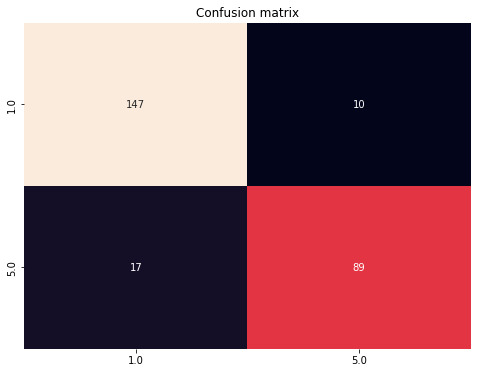

In [110]:
labels = grid_cntv.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

### 1st type
𝑡𝑓−𝑖𝑑𝑓

In [111]:
clf_tf_idf = Pipeline(
    [('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression())]
)

params_tf_idf={
    'vect__analyzer': ['word'],
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'tfidf__use_idf': (True, False),
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1', 'l2']
}

scores=['accuracy','f1']

In [112]:
grid_tf_idf = GridSearchCV(
    clf_tf_idf, 
    param_grid=params_tf_idf, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [113]:
grid_tf_idf.fit(X_train, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


C:\Users\spass\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889
 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889
 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889
 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889
 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889 0.63888889
        nan        nan        nan        nan        n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'clf__penalty': ['l1', 'l2'],
                         'tfidf__use_idf': (True, False),
                         'vect__analyzer': ['word'],
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=1)

In [114]:
# print(grid_tf_idf.best_estimator_)
print("Best score: %0.3f" % grid_tf_idf.best_score_)

Best score: 0.899


In [115]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.90
Recall:      0.89
F1_score:    0.89
Accuracy:    0.90


In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.90      0.94      0.92       157
         5.0       0.90      0.84      0.87       106

    accuracy                           0.90       263
   macro avg       0.90      0.89      0.89       263
weighted avg       0.90      0.90      0.90       263



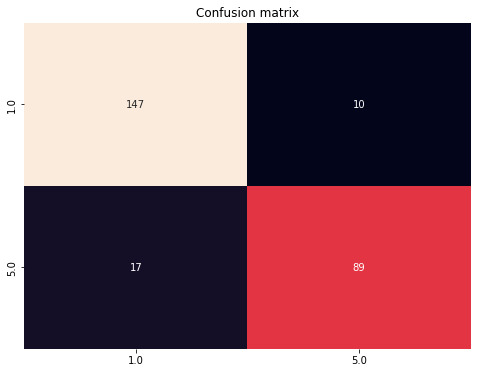

In [117]:
labels = grid_tf_idf.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

Cингулярное разложение

In [118]:
clf_tf_idf_TruncatedSVD = Pipeline(
    [('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('tsvd', TruncatedSVD()),
     ('clf', LogisticRegression())]
)

params_tf_idf_TruncatedSVD={
    'vect__analyzer': ['word'],
    'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'tsvd__n_components': [5, 10, 25, 50, 100],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1', 'l2']
}

scores=['accuracy','f1']

In [119]:
grid_tf_idf_TruncatedSVD = GridSearchCV(
    clf_tf_idf_TruncatedSVD, 
    param_grid=params_tf_idf_TruncatedSVD, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [ ]:
grid_tf_idf_TruncatedSVD.fit(X_train, y_train)

Fitting 3 folds for each of 210 candidates, totalling 630 fits


In [ ]:
# print(grid_tf_idf_TruncatedSVD.best_estimator_)
print("Best score: %0.3f" % grid_tf_idf_TruncatedSVD.best_score_)

In [293]:
predictions=grid_tf_idf_TruncatedSVD.best_estimator_.predict(X_test)

In [294]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.38
Recall:      0.50
F1_score:    0.43
Accuracy:    0.76


C:\Users\spass\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
labels = grid_tf_idf_TruncatedSVD.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

#### LDA

In [ ]:
clf_tf_idf_LDA = Pipeline(
    [('vect', CountVectorizer()),
     ('lda', LatentDirichletAllocation()),
     ('clf', LogisticRegression())]
)

params_tf_idf_LDA={
    'vect__analyzer': ['word'],
    'vect__max_df': [0.75],
    'vect__ngram_range': [(1, 1)],
    'lda__n_components' : [25, 50, 100],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l2']
}

scores=['accuracy', 'f1']

In [276]:
grid_tf_idf_LDA = GridSearchCV(
    clf_tf_idf_LDA, 
    param_grid=params_tf_idf_LDA, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [277]:
grid_tf_idf_LDA.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('lda', LatentDirichletAllocation()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'clf__penalty': ['l2'],
                         'lda__n_components': [25, 50, 100],
                         'vect__analyzer': ['word'], 'vect__max_df': [0.75],
                         'vect__ngram_range': [(1, 1)]},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=1)

In [278]:
# print(grid_tf_idf_LDA.best_estimator_)
print("Best score: %0.3f" % grid_tf_idf_LDA.best_score_)

Best score: 0.731


In [281]:
predictions=grid_tf_idf_LDA.best_estimator_.predict(X_test)

In [282]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.38
Recall:      0.50
F1_score:    0.43
Accuracy:    0.76


C:\Users\spass\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [283]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.76      1.00      0.87        13
         5.0       0.00      0.00      0.00         4

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17



C:\Users\spass\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\spass\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\spass\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


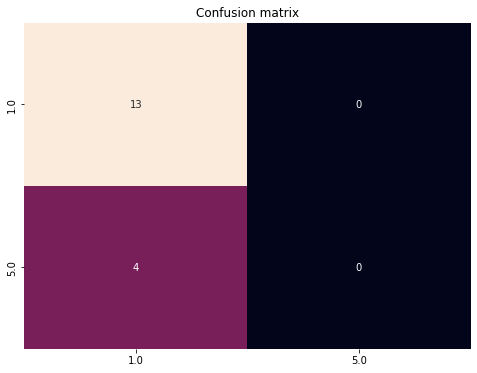

In [284]:
labels = grid_tf_idf_LDA.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

In [295]:
models=['grid_cntv', 'grid_tf_idf', 'grid_tf_idf_TruncatedSVD', 'grid_tf_idf_LDA']

for model in models:
    print(model[5:])
    predictions=eval(model).best_estimator_.predict(X_test)
    print("f1_score: {0:6.3f}\nAccuracy: {0:6.3f}\n\n".format(
        f1_score(y_test, predictions, average='macro'), 
        accuracy_score(y_test, predictions)))

cntv
f1_score:  0.433
Accuracy:  0.433


tf_idf
f1_score:  0.433
Accuracy:  0.433


tf_idf_TruncatedSVD
f1_score:  0.433
Accuracy:  0.433


tf_idf_LDA
f1_score:  0.433
Accuracy:  0.433


